In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [7]:
df = pd.read_csv('C:/Users/agamb/Desktop/Alt_Project/Datasets/Maternal health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [8]:
df.shape

(1014, 7)

In [9]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [11]:
new_df = df.drop(columns=['RiskLevel'])

<Axes: >

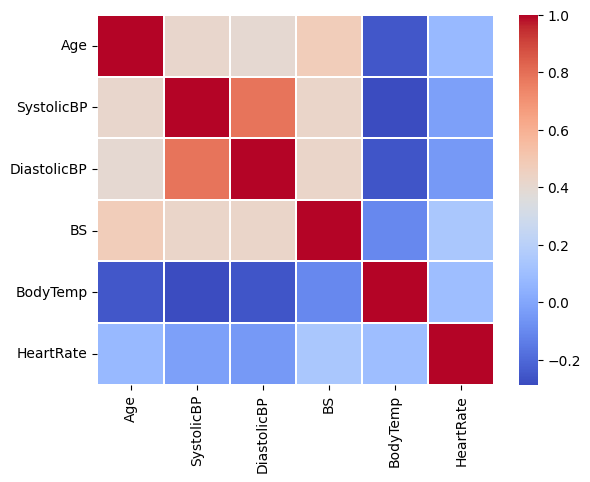

In [12]:
sns.heatmap(new_df.corr(),cmap='coolwarm',linewidths=0.2)

C:\Users\agamb\AppData\Local\Temp\ipykernel_27992\41339351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_df['SystolicBP'],y=new_df['DiastolicBP'],palette='viridis',ax=ax[0])
C:\Users\agamb\AppData\Local\Temp\ipykernel_27992\41339351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_df['BodyTemp'],y=new_df['SystolicBP'],palette='viridis',ax=ax[1])


<Axes: xlabel='BodyTemp', ylabel='SystolicBP'>

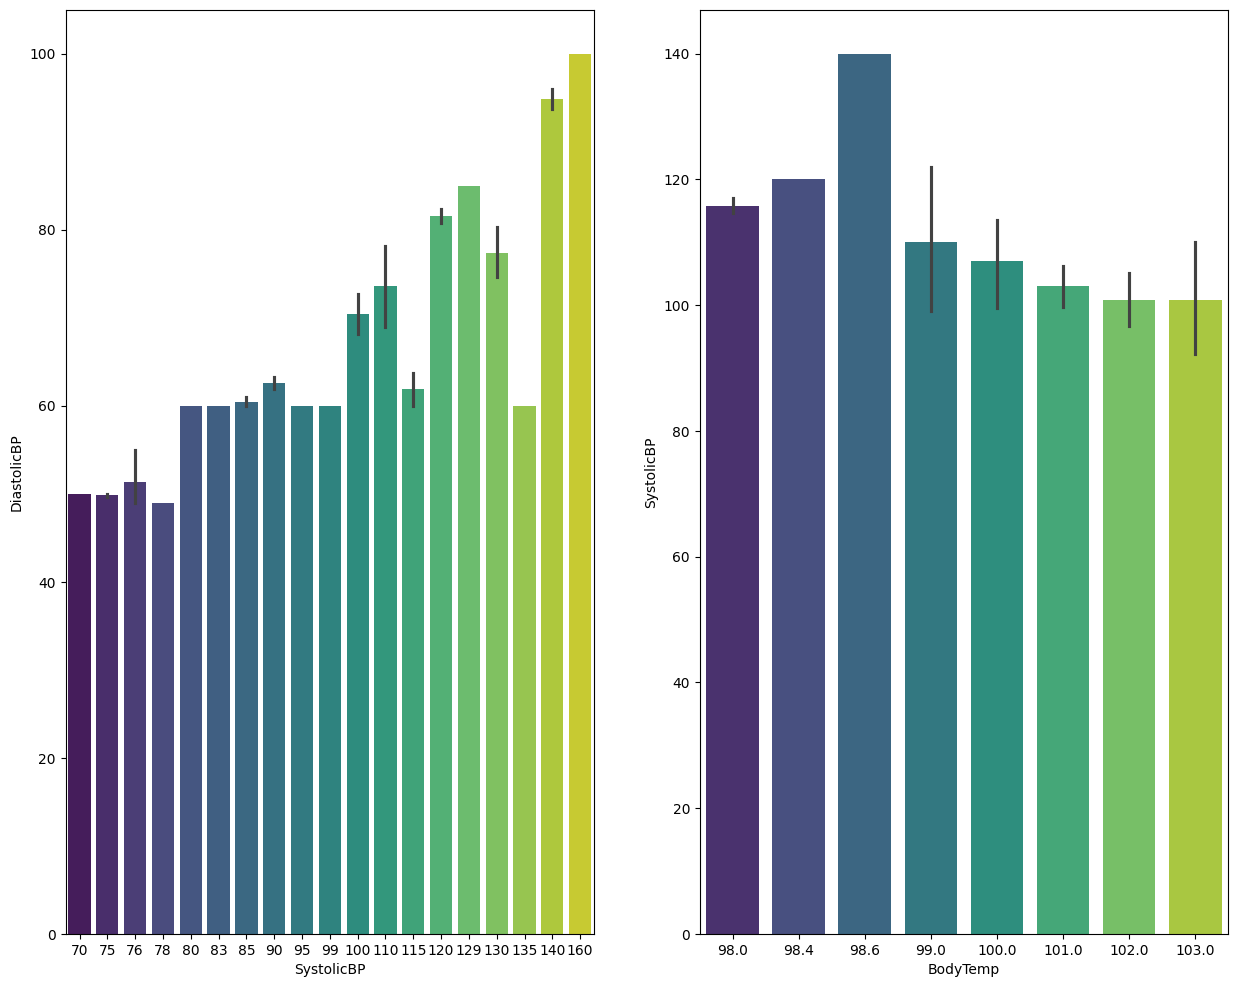

In [13]:
fig,ax = plt.subplots(1,2,figsize=(15,12))
sns.barplot(x=new_df['SystolicBP'],y=new_df['DiastolicBP'],palette='viridis',ax=ax[0])
sns.barplot(x=new_df['BodyTemp'],y=new_df['SystolicBP'],palette='viridis',ax=ax[1])

In [14]:
scaler = StandardScaler()
standardised = scaler.fit_transform(new_df)

In [15]:
encode = LabelEncoder()
Y = encode.fit_transform(df['RiskLevel'])

In [16]:
X = standardised

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
y_pred = model.predict(x_test)

In [20]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("Classification report:")
print(classification_report(y_test,y_pred))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred))

confusion matrix:
[[40  2  5]
 [ 4 71  5]
 [13 42 21]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        47
           1       0.62      0.89      0.73        80
           2       0.68      0.28      0.39        76

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203

Accuracy score:
0.6502463054187192


In [21]:
from sklearn.tree import DecisionTreeClassifier
# model2 = DecisionTreeClassifier(criterion='entropy',max_depth=115,random_state=42)
model2 = DecisionTreeClassifier(criterion='gini',max_depth=25,random_state=42)
model2.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
y_pred2 = model2.predict(x_test)

In [23]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred2))
print("Classification report:")
print(classification_report(y_test,y_pred2))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred2))

confusion matrix:
[[40  1  6]
 [ 5 62 13]
 [ 3  9 64]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        47
           1       0.86      0.78      0.82        80
           2       0.77      0.84      0.81        76

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203

Accuracy score:
0.8177339901477833


In [24]:
from sklearn.ensemble import RandomForestClassifier
# model_ensemble = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=42,criterion='entropy')
model_ensemble = RandomForestClassifier(n_estimators=200,max_depth=20,random_state=42,criterion='gini')

In [25]:
model_ensemble.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_pred_ensemble = model_ensemble.predict(x_test)

In [27]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred_ensemble))
print("Classification report:")
print(classification_report(y_test,y_pred_ensemble))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred_ensemble))

confusion matrix:
[[40  1  6]
 [ 3 61 16]
 [ 3  7 66]]
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.88      0.76      0.82        80
           2       0.75      0.87      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.82      0.82       203

Accuracy score:
0.8226600985221675


In [28]:
from xgboost import XGBClassifier
model_boost = XGBClassifier()
model_boost.fit(x_train,y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [29]:
y_pred_boost = model_boost.predict(x_test)

In [30]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred_boost))
print("Classification report:")
print(classification_report(y_test,y_pred_boost))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred_boost))

confusion matrix:
[[41  1  5]
 [ 4 66 10]
 [ 3  9 64]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.87      0.82      0.85        80
           2       0.81      0.84      0.83        76

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203

Accuracy score:
0.8423645320197044


In [34]:
import joblib 

joblib.dump(model_boost,'model_boost.joblib')

['model_boost.joblib']